In [8]:
'''
Untuk bisa memakai genetic selection CV harus menggunakan numpy versi dibawah 1.24, jadi harus uninstall numpy exixting dan reinstall numpy 1.23.1
kemudian restart runtime
'''
!pip uninstall numpy
!pip install numpy==1.23.1

Found existing installation: numpy 1.23.1
Uninstalling numpy-1.23.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.23.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.23.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax 0.1.7 requires jax>=0.4.6, but

In [3]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.feature_selection import GeneticSelectionCV
from genetic_selection import GeneticSelectionCV
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import *
from google.colab import files, drive, data_table
from google.colab.data_table import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
print(np.__version__)

1.23.1


In [4]:
# membaca data .csv untuk dilakukan preparation
url = 'https://raw.githubusercontent.com/Dtscience80/Project_ISAST_2022/main/df_minmax.csv'
df=pd.read_csv(url)
display(df.head())

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
0,0.689680,0.987654,0.6875,1.000000,0.000000,0.939394,0.002220,0.5,0.016696,0.694596,1.0,0.000000,0.584459,0.930882
1,0.682562,0.962963,0.6250,1.000000,0.024624,0.909091,0.033619,0.5,0.015495,0.629661,1.0,0.000000,0.672297,0.963235
2,0.674021,0.839506,0.3125,0.928571,0.051984,0.848485,0.065017,0.5,0.013631,0.540427,1.0,0.306818,0.516892,0.630882
3,0.664057,0.888889,0.5625,0.928571,0.065663,0.878788,0.098319,0.5,0.029871,0.444491,1.0,0.147727,0.692568,0.819118
4,0.658363,0.864198,0.4375,0.928571,0.073871,0.848485,0.131304,0.5,0.061275,0.358609,1.0,0.375000,0.523649,0.598529


In [5]:
# memisahkan data untuk training dan testing dari data Normalisasi Untuk masing2 target 
X = df.drop(columns=['CL', 'CD', 'CM25', 'CYAW', 'CROLL', 'CY'])   #Feature Matrix
a = df['CL']          #Target Variable
b = df['CD']          #Target Variable
c = df['CM25']        #Target Variable
d = df['CYAW']        #Target Variable
e = df['CROLL']       #Target Variable
f = df['CY']          #Target Variable
X

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA
0,0.689680,0.987654,0.6875,1.000000,0.000000,0.939394,0.002220,0.5
1,0.682562,0.962963,0.6250,1.000000,0.024624,0.909091,0.033619,0.5
2,0.674021,0.839506,0.3125,0.928571,0.051984,0.848485,0.065017,0.5
3,0.664057,0.888889,0.5625,0.928571,0.065663,0.878788,0.098319,0.5
4,0.658363,0.864198,0.4375,0.928571,0.073871,0.848485,0.131304,0.5
...,...,...,...,...,...,...,...,...
576,0.654093,0.592593,0.2500,0.714286,0.325581,0.575758,0.813828,0.5
577,0.661210,0.617284,0.3750,0.714286,0.328317,0.606061,0.845227,0.5
578,0.669751,0.765432,0.8125,0.642857,0.336525,0.636364,0.875040,0.5
579,0.686833,0.617284,0.4375,0.642857,0.344733,0.575758,0.904535,0.5


## **Feature Selection **

# Scoring list : 
[metrics.explained_variance_score](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)

*   ‘max_error’ metrics.max_error
*   ‘neg_mean_absolute_error’ metrics.mean_absolute_error
*   ‘neg_mean_squared_error’ metrics.mean_squared_error
*   ‘neg_root_mean_squared_error’ metrics.mean_squared_error
*   ‘neg_mean_squared_log_error’ metrics.mean_squared_log_error
*   ‘neg_median_absolute_error’ metrics.median_absolute_error
*   ‘r2’ metrics.r2_score
*   ‘neg_mean_poisson_deviance’ metrics.mean_poisson_deviance
*   ‘neg_mean_gamma_deviance’ metrics.mean_gamma_deviance
*   ‘neg_mean_absolute_percentage_error’ 
*   ‘d2_absolute_error_score’
*   ‘d2_pinball_score’ metrics.d2_pinball_score
*   ‘d2_tweedie_score’ metrics.d2_tweedie_score



In [6]:
# Gantilah a disini dengan b, c, d, e dan f sesuai target yang telah ditentukan sebelumnya 
Y = a.astype(float)

#estimators = linear_model.LinearRegression()
estimators = DecisionTreeRegressor()
#estimators = RandomForestRegressor()
#estimators = MLPRegressor()
t1=time.time()
print(t1)

report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 

print("Estimator dipakai : ", estimators )
print("Target : ", Y )
for i in range(1,9):  
  selector = GeneticSelectionCV(estimators,
                                cv = 5,
                                verbose = 1,
                                scoring="neg_mean_squared_error", 
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 50,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.1,
                                tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  selector = selector.fit(X, Y)
  genfeats = X.columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats: {} of {}, scores : {} " .format(genfeats, selector.n_features_, round(selector.generation_scores_[-1], 3)))

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)

report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore
#Lama waktu Proses 
t2=time.time()
t_polyfit = float(t2-t1)
print("Time taken: {} seconds".format(t_polyfit))

1681230112.7675455
Estimator dipakai :  DecisionTreeRegressor()
Target :  0      0.016696
1      0.015495
2      0.013631
3      0.029871
4      0.061275
         ...   
576    0.940713
577    0.952397
578    0.913494
579    0.883167
580    0.890583
Name: CL, Length: 581, dtype: float64
Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	200   	[-0.077639  1.        0.017312]	[ 0.042715  0.        0.010783]	[-0.160331  1.        0.001074]	[-0.001036  1.        0.040534]
1  	114   	[-2300.0354       1.12      2300.008201]	[ 4208.305735     0.552811  4208.3206  ]	[-10000.            0.            0.001074]	[   -0.001036     3.       10000.      ]
2  	114   	[-2550.016039     1.1       2550.004231]	[ 4358.602781     0.509902  4358.609689]	[-10000.            0.            0.001074]	[   -0.001036     3.       10000.      ]
3  	112   	[-1500.003488     1.07  

In [7]:
#Print Reports 
report["Scores"] = np.round(report["Scores"], 3)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
DataTable(report)
print("Feature selection of '" + Y.name + "' recommend:", ga_feats)
print("Estimator : {}, reports : ". format(selector.estimator_))
report

Feature selection of 'CL' recommend: ['ALFA']
Estimator : DecisionTreeRegressor(), reports : 


,No of Feats,Chosen Feats,Scores
0,1,[ALFA],-0.001
1,2,"[ALFA, BETA]",-0.001
2,2,"[ALFA, BETA]",-0.001
3,2,"[ALFA, BETA]",-0.001
4,2,"[ALFA, BETA]",-0.001
5,2,"[ALFA, BETA]",-0.001
6,2,"[ALFA, BETA]",-0.001
7,2,"[ALFA, BETA]",-0.001


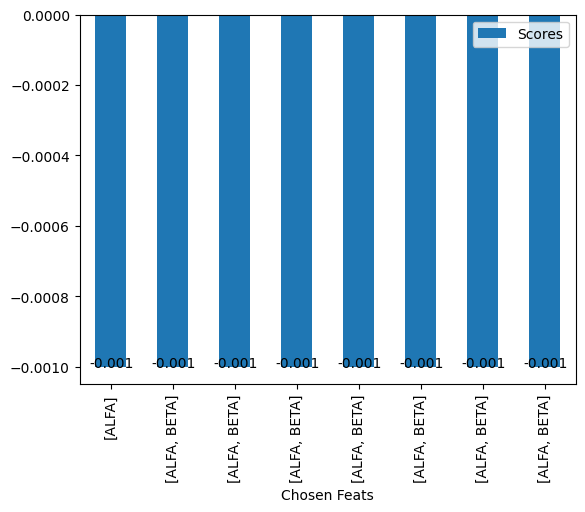

In [8]:
# Plot feature score 
score = np.round(report["Scores"], 3)
report.plot(kind='bar',x='Chosen Feats',y='Scores')
xlocs, xlabs = plt.xticks()
for i, v in enumerate(score):
    plt.text(xlocs[i] - 0.35, v , str(v))